In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

# Import Data
The following code imports all 5 sensor data and cleans up the tables by changing the column names and and changing the data values to number. It imports some sensor metadata as well

In [2]:
bt1 = pd.read_csv("BT1 Data.csv")
bt1 = bt1.iloc[:,:-3]
bt1 = bt1.rename(columns = {"Wave":"time", "Unnamed: 1":"burst", "Unnamed: 2":"depth", 
                              "Unnamed: 3":"sig wave height", "Unnamed: 4":"sig wave period",
                              "Unnamed: 5":"1/10 wave height", "Unnamed: 6":"1/10 wave period",
                             "Unnamed: 7": "max wave height", "Unnamed: 8":"max wave period",
                             "Unnamed: 9": "avg wave height", "Unnamed: 10":"avg wave period",
                             "Unnamed: 11":"wave energy"})
bt1 = bt1.drop(0)
bt1 = bt1.reset_index()
bt1["avg wave height"] = pd.to_numeric(bt1["avg wave height"],errors='coerce')
bt1["depth"] = pd.to_numeric(bt1["depth"],errors='coerce')
bt1["sig wave height"] = pd.to_numeric(bt1["sig wave height"],errors='coerce')
bt1["depth_corrected"] = 2.150 + bt1["depth"]


bt2 = pd.read_csv("BT2 Data.csv")
bt2 = bt2.rename(columns = {"Wave":"time", "Unnamed: 1":"burst", "Unnamed: 2":"depth", 
                              "Unnamed: 3":"sig wave height", "Unnamed: 4":"sig wave period",
                              "Unnamed: 5":"1/10 wave height", "Unnamed: 6":"1/10 wave period",
                             "Unnamed: 7": "max wave height", "Unnamed: 8":"max wave period",
                             "Unnamed: 9": "avg wave height", "Unnamed: 10":"avg wave period",
                             "Unnamed: 11":"wave energy"})
bt2 = bt2.drop(0)
bt2 = bt2.reset_index()
bt2["avg wave height"] = pd.to_numeric(bt2["avg wave height"],errors='coerce')
bt2["depth"] = pd.to_numeric(bt2["depth"],errors='coerce')
bt2["sig wave height"] = pd.to_numeric(bt2["sig wave height"],errors='coerce')
bt2["depth_corrected"] = 2.391 + bt2["depth"]

bt3 = pd.read_csv("BT3 Data.csv")
bt3 = bt3.rename(columns = {"Wave":"time", "Unnamed: 1":"burst", "Unnamed: 2":"depth", 
                              "Unnamed: 3":"sig wave height", "Unnamed: 4":"sig wave period",
                              "Unnamed: 5":"1/10 wave height", "Unnamed: 6":"1/10 wave period",
                             "Unnamed: 7": "max wave height", "Unnamed: 8":"max wave period",
                             "Unnamed: 9": "avg wave height", "Unnamed: 10":"avg wave period",
                             "Unnamed: 11":"wave energy"})
bt3 = bt3.drop(0)
bt3 = bt3.reset_index()
bt3["avg wave height"] = pd.to_numeric(bt3["avg wave height"],errors='coerce')
bt3["depth"] = pd.to_numeric(bt3["depth"],errors='coerce')
bt3["sig wave height"] = pd.to_numeric(bt3["sig wave height"],errors='coerce')
bt3["depth_corrected"] = 2.296 + bt3["depth"]

bt4 = pd.read_csv("BT4 Data.csv")
bt4 = bt4.rename(columns = {"Wave":"time", "Unnamed: 1":"burst", "Unnamed: 2":"depth", 
                              "Unnamed: 3":"sig wave height", "Unnamed: 4":"sig wave period",
                              "Unnamed: 5":"1/10 wave height", "Unnamed: 6":"1/10 wave period",
                             "Unnamed: 7": "max wave height", "Unnamed: 8":"max wave period",
                             "Unnamed: 9": "avg wave height", "Unnamed: 10":"avg wave period",
                             "Unnamed: 11":"wave energy"})
bt4 = bt4.drop(0)
bt4 = bt4.reset_index()
bt4["avg wave height"] = pd.to_numeric(bt4["avg wave height"],errors='coerce')
bt4["depth"] = pd.to_numeric(bt4["depth"],errors='coerce')
bt4["sig wave height"] = pd.to_numeric(bt4["sig wave height"],errors='coerce')
bt4["depth_corrected"] = 2.280 + bt4["depth"]

bt5 = pd.read_csv("BT5 Data.csv")
bt5 = bt5.rename(columns = {"Wave":"time", "Unnamed: 1":"burst", "Unnamed: 2":"depth", 
                              "Unnamed: 3":"sig wave height", "Unnamed: 4":"sig wave period",
                              "Unnamed: 5":"1/10 wave height", "Unnamed: 6":"1/10 wave period",
                             "Unnamed: 7": "max wave height", "Unnamed: 8":"max wave period",
                             "Unnamed: 9": "avg wave height", "Unnamed: 10":"avg wave period",
                             "Unnamed: 11":"wave energy"})
bt5 = bt5.drop(0)
bt5 = bt5.reset_index()
bt5["avg wave height"] = pd.to_numeric(bt5["avg wave height"],errors='coerce')
bt5["depth"] = pd.to_numeric(bt5["depth"],errors='coerce')
bt5["sig wave height"] = pd.to_numeric(bt5["sig wave height"],errors='coerce')
bt5["depth_corrected"] = 2.238 + bt5["depth"]

sensors = pd.read_csv("data_sensors.csv")

Preview of one of the bt1 data table

In [3]:
bt1.head(1)

,index,time,burst,depth,sig wave height,sig wave period,1/10 wave height,1/10 wave period,max wave height,max wave period,avg wave height,avg wave period,wave energy,depth_corrected
0,1,2021-06-15 13:00:00.000,1,0.134395,0.0009,0.5329,0.0012,0.5162,0.0017,0.6680,0.0005,0.5162,0.0008,2.284395


Preview of the sensor meta data table

In [4]:
sensors[10:15]

,Point ID,Northing,Easting,Elevation,Feature Code,Latitude (Local),Longitude (Local),Ellipsoid Height (Local),GNSS Vector Observation.H. Precision,GNSS Vector Observation.V. Precision,GNSS Vector Observation.RMS,GNSS Vector Observation.Start Time,GNSS Vector Observation.Duration,Notes by Lukas 6/21/2021
10,bt1,4159925.641,575488.151,2.120,xs,37.583293,-122.145023,-30.445,0.0077,0.0115,0.0107,6/16/2021 23:12,00:10.0,"""XSMT"" is the bay-edge marsh transect that con..."
11,bt2,4159927.030,575490.531,2.331,xs,37.583305,-122.144996,-30.234,0.0077,0.0115,0.0107,6/16/2021 23:13,00:10.0,BT2 instrument is at this point.
12,bt3,4159931.608,575496.134,2.241,xs,37.583346,-122.144932,-30.324,0.0077,0.0114,0.0107,6/16/2021 23:16,00:10.0,BT3 instrument is at this point.
13,bt4,4159937.883,575506.309,2.220,xs,37.583401,-122.144817,-30.345,0.0076,0.0111,0.0107,6/16/2021 23:21,00:09.0,BT4 instrument is at this point.
14,bt5,4159942.841,575515.798,2.198,xs,37.583445,-122.144708,-30.367,0.0082,0.0120,0.0121,6/16/2021 23:26,00:10.0,BT5 instrument is at this point.


This code and plot shows the average wave height and the depth the sensor records in a short time period. You can see that when the waves  are coming in and going out with the red plot on the graph.

Start time:  2021-06-15 13:00:00.000
 End time:  2021-06-17 00:00:00.000


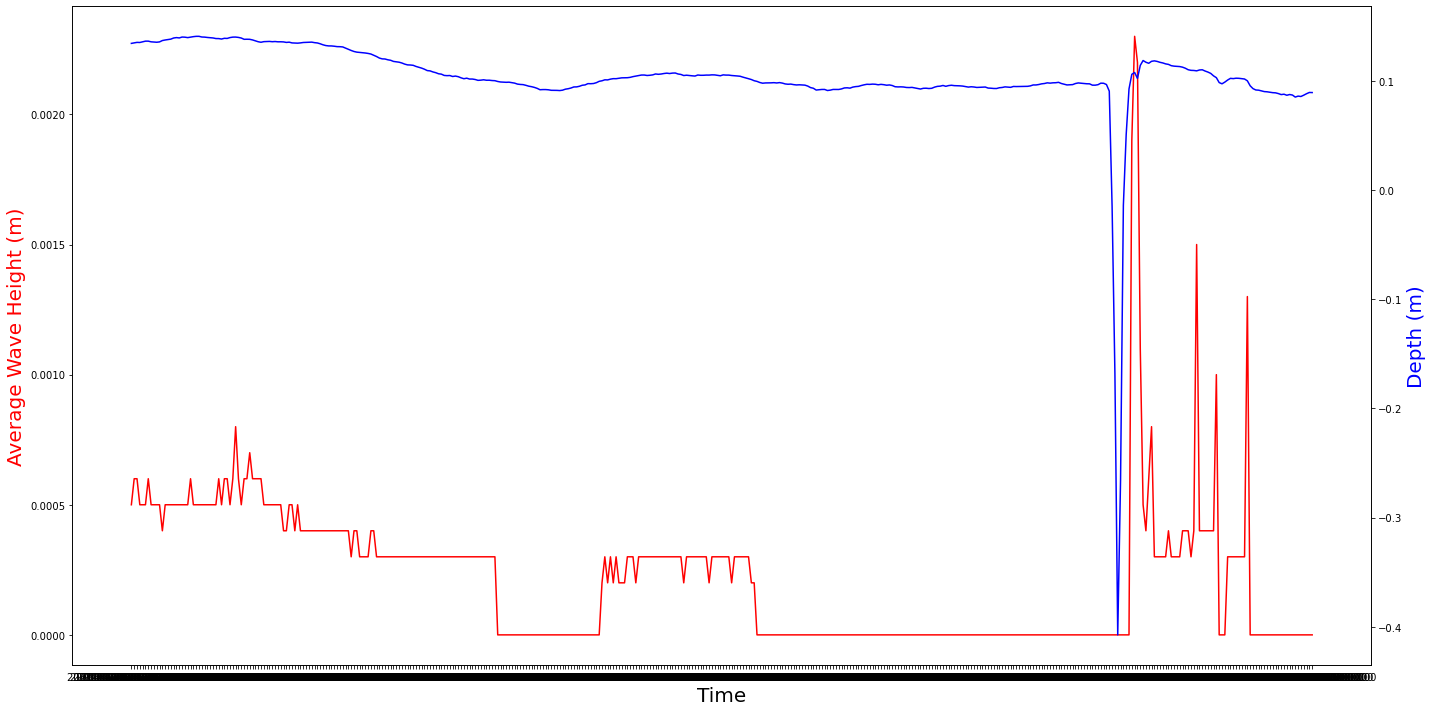

In [5]:
start = 0
end = 420
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_xlabel("Time", fontsize = 20)
ax1.set_ylabel("Average Wave Height (m)", color="red", fontsize = 20)
ax1.plot(bt1["time"][start:end], bt1["avg wave height"][start:end], color="red")

ax2 = ax1.twinx()
ax2.set_xlabel("Time", fontsize = 20)
ax2.set_ylabel("Depth (m)", color="blue", fontsize = 20)
ax2.plot(bt1["time"][start:end], bt1["depth"][start:end], color="blue")
#ax2.set_ylim([-0.1,0.5])
print("Start time: ", bt1["time"][start])
print(" End time: ", bt1["time"][end])
plt.tight_layout()
plt.show()

This code and plot overlays wave heights from different sensors over BT1. For BT2 and BT5, you can see that they have the same shape as BT1, but less magnitude and lag a bit behind. This makes sense as they are further inland; the wave attenuates so wave heights are less and the wave reaches it later just because its further from the shore. For BT3 and BT4, the shape is different from BT1. This might mean that those sensors are in a slightly different orientation from the rest. 

Start time:  2021-06-15 13:00:00.000
 End time:  2021-06-17 00:00:00.000


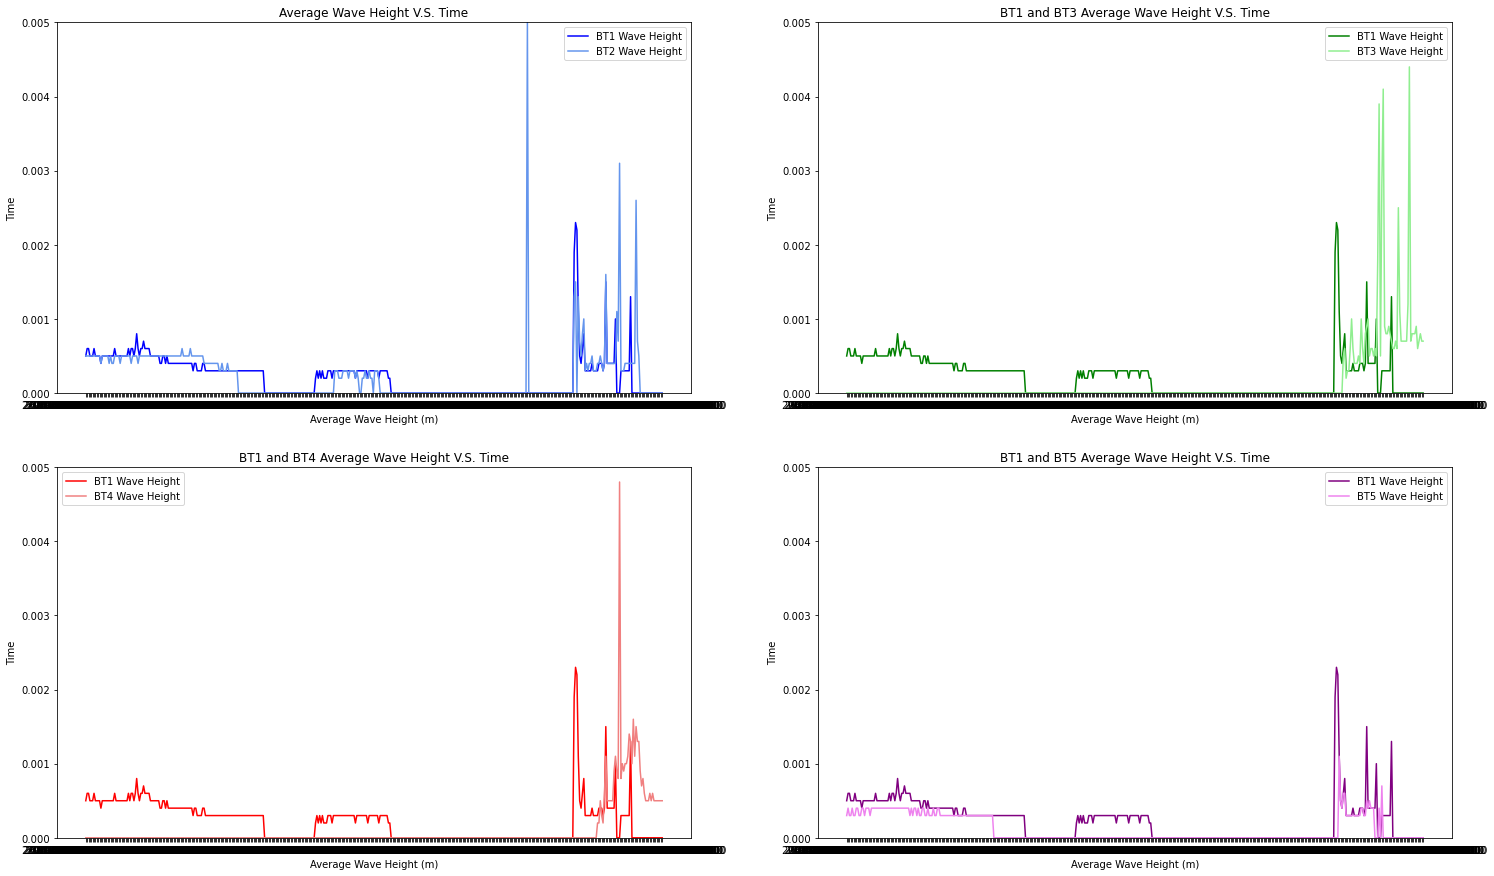

In [14]:
start = 0
end = 420
fig = plt.figure(figsize=(25,15))

fig.add_subplot(2,2,1)
plt.plot(bt1["time"][start:end], bt1["avg wave height"][start:end], color = "blue")
plt.plot(bt2["time"][start:end], bt2["avg wave height"][start:end], color = "cornflowerblue")
plt.legend(["BT1 Wave Height", "BT2 Wave Height"])
plt.ylim([0, 0.005])
plt.title("Average Wave Height V.S. Time")
plt.xlabel("Average Wave Height (m)")
plt.ylabel("Time")

fig.add_subplot(2,2,2)
plt.plot(bt1["time"][start:end], bt1["avg wave height"][start:end], color = "green")
plt.plot(bt3["time"][start:end], bt3["avg wave height"][start:end], color = "lightgreen")
plt.legend(["BT1 Wave Height", "BT3 Wave Height"])
plt.ylim([0, 0.005])
plt.title("BT1 and BT3 Average Wave Height V.S. Time")
plt.xlabel("Average Wave Height (m)")
plt.ylabel("Time")

fig.add_subplot(2,2,3)
plt.plot(bt1["time"][start:end], bt1["avg wave height"][start:end], color = "red")
plt.plot(bt4["time"][start:end], bt4["avg wave height"][start:end], color = "lightcoral")
plt.legend(["BT1 Wave Height", "BT4 Wave Height"])
plt.ylim([0, 0.005])
plt.title("BT1 and BT4 Average Wave Height V.S. Time")
plt.xlabel("Average Wave Height (m)")
plt.ylabel("Time")

fig.add_subplot(2,2,4)
plt.plot(bt1["time"][start:end], bt1["avg wave height"][start:end], color = "purple")
plt.plot(bt5["time"][start:end], bt5["avg wave height"][start:end], color = "violet")
plt.legend(["BT1 Wave Height", "BT5 Wave Height"])
plt.ylim([0, 0.005])
plt.title("BT1 and BT5 Average Wave Height V.S. Time")
plt.xlabel("Average Wave Height (m)")
plt.ylabel("Time")

print("Start time: ", bt1["time"][start])
print(" End time: ", bt1["time"][end])
plt.show()

This code and plot overlays the wave heights for BT3 and BT4. They both have the same shape. Bt4 lags a bit behind BT3 and is a bit less in magnitude.

Start time:  2021-06-15 13:00:00.000
 End time:  2021-06-17 00:00:00.000


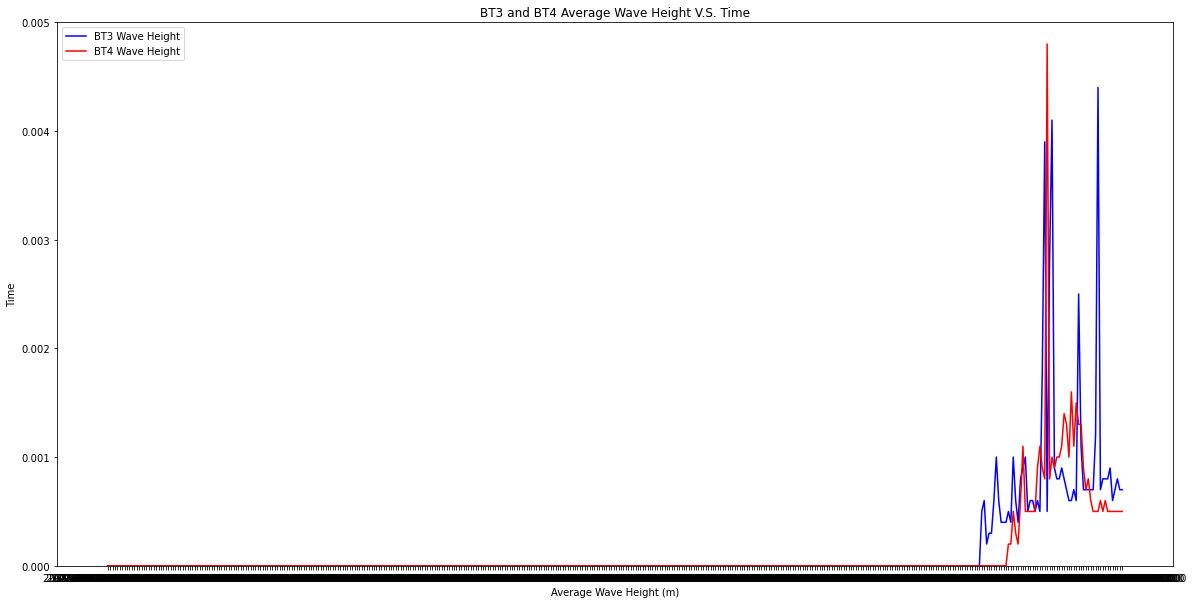

In [15]:
start = 0
end = 420

fig = plt.figure(figsize=(20,10))
plt.plot(bt3["time"][start:end], bt3["avg wave height"][start:end], color = "blue")
plt.plot(bt4["time"][start:end], bt4["avg wave height"][start:end], color = "red")
plt.legend(["BT3 Wave Height", "BT4 Wave Height"])
plt.ylim([0, 0.005])
plt.title("BT3 and BT4 Average Wave Height V.S. Time")
plt.xlabel("Average Wave Height (m)")
plt.ylabel("Time")

print("Start time: ", bt1["time"][start])
print(" End time: ", bt1["time"][end])
plt.show()

This code and plot shows the all points of signficant wave height plotted with depth for the BT1 sensor. As you can see there's a trend where higher wave heights are correlated with deeper waters. The sloped cut-off shows that the signficant wave height can never be greater than the depth. However, the vertical cut-off at a depth of 0.1m is very strange. We suspect that the sensor is not sensitive enough to pick up waves at a depth of 0.1m or smaller.

Start time:  2021-06-15 13:00:00.000
End time:  2021-08-12 23:40:00.000
16833  data points


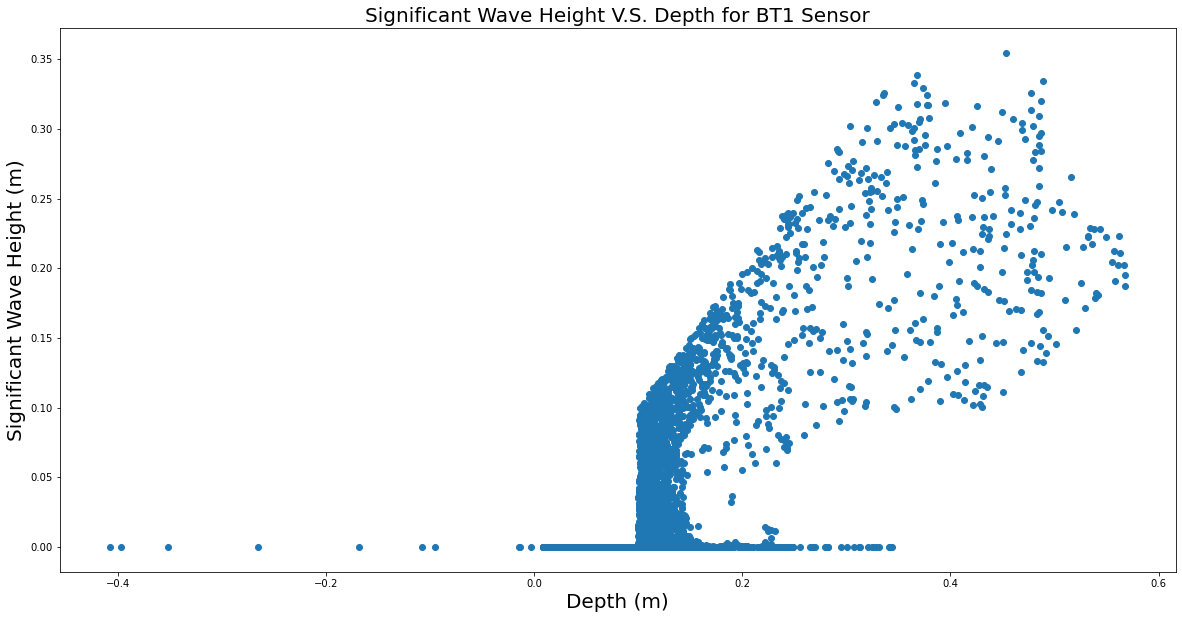

In [7]:
start = 0
end = len(bt1)-1
fig = plt.figure(figsize=(20,10))
plt.scatter(bt1["depth"][start:end], bt1["sig wave height"][start:end])
plt.title("Significant Wave Height V.S. Depth for BT1 Sensor", fontsize=20)
plt.xlabel("Depth (m)", fontsize=20)
plt.ylabel("Significant Wave Height (m)", fontsize=20)
print("Start time: ", bt1["time"][start])
print("End time: ", bt1["time"][end])
print(len(bt1), " data points")
plt.show()

This code and plot shows the significant wave plotted against depth for the BT2 sensor. You can see the general trend and the cut-offs are similar to the plot above for BT1. There are also less non-zero significant wave height data points. This might mean that the waves are not reaching the BT2 sensor or they attenuate to below the 0.1 m cut-off

Start time:  2021-06-15 13:00:00.000
End time:  2021-08-12 23:30:00.000
16833  data points


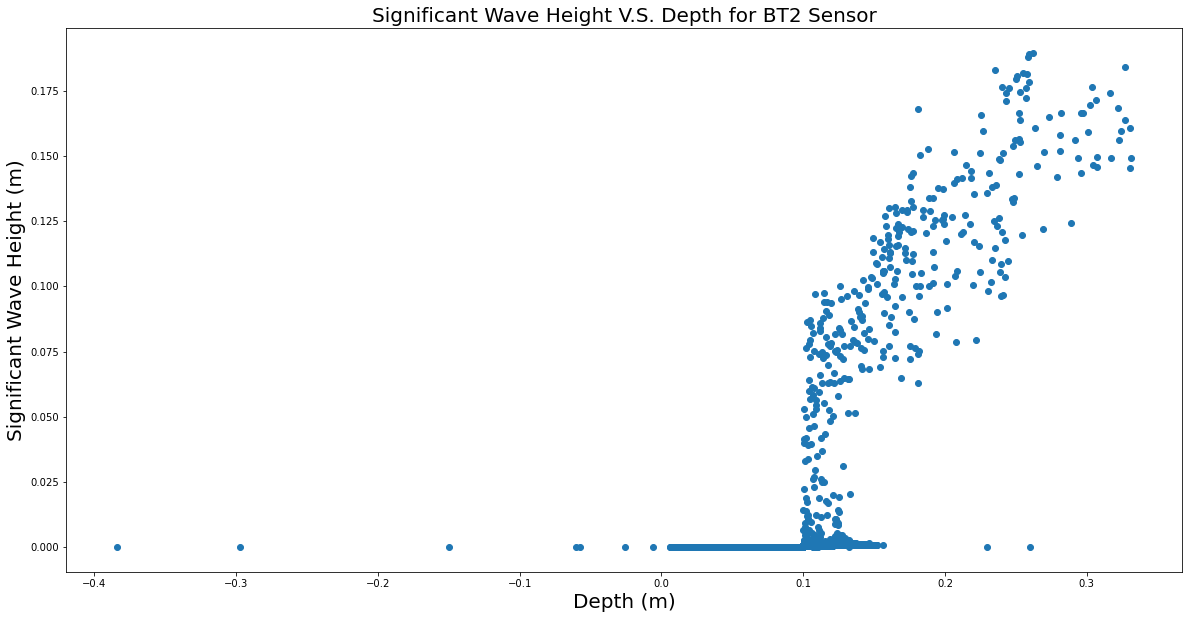

In [8]:
start = 0
end = len(bt2)-1
fig = plt.figure(figsize=(20,10))
plt.scatter(bt2["depth"][start:end], bt2["sig wave height"][start:end])
plt.title("Significant Wave Height V.S. Depth for BT2 Sensor", fontsize=20)
plt.xlabel("Depth (m)", fontsize=20)
plt.ylabel("Significant Wave Height (m)", fontsize=20)
print("Start time: ", bt2["time"][start])
print("End time: ", bt2["time"][end])
print(len(bt1), " data points")
plt.show()

The following code and plot shows significant wave height plotted against depth for all five sensors. You can see that wave heights get lower and lower the further inland the sensor is.

Start time:  2021-06-15 13:00:00.000
End time:  2021-08-12 23:40:00.000
16833  data points


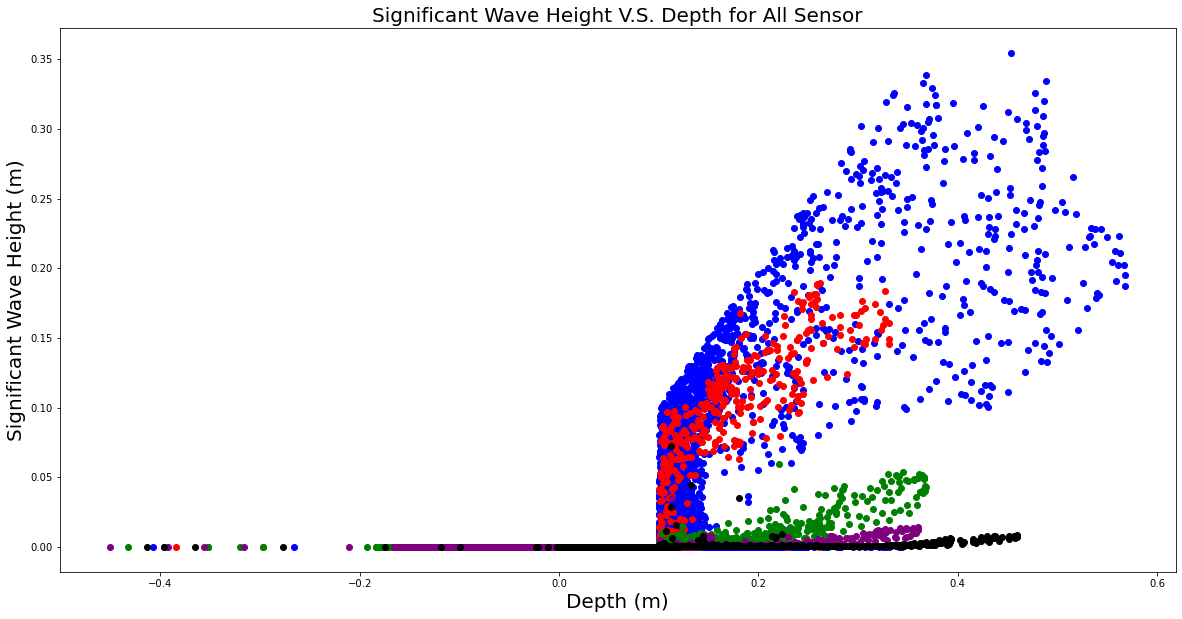

In [9]:
start = 0
end = len(bt1)-1
fig = plt.figure(figsize=(20,10))
plt.scatter(bt1["depth"][start:end], bt1["sig wave height"][start:end],color = "blue")
plt.scatter(bt2["depth"][start:end], bt2["sig wave height"][start:end],color = "red")
plt.scatter(bt3["depth"][start:end], bt3["sig wave height"][start:end],color = "green")
plt.scatter(bt4["depth"][start:end], bt4["sig wave height"][start:end],color = "purple")
plt.scatter(bt5["depth"][start:end], bt5["sig wave height"][start:end],color = "black")
plt.title("Significant Wave Height V.S. Depth for All Sensor", fontsize=20)
plt.xlabel("Depth (m)", fontsize=20)
plt.ylabel("Significant Wave Height (m)", fontsize=20)
print("Start time: ", bt1["time"][start])
print("End time: ", bt1["time"][end])
print(len(bt1), " data points")
plt.show()